<a href="https://colab.research.google.com/github/KevinAsanda/Mr-KA-Manzini-22416153/blob/main/22416153.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MR KA Manzini
# 22416153

#Project Overview: Leveraging Machine Learning for Crime Analysis in South Africa

Crime presents a persistent and significant challenge in South Africa, affecting community safety, social well-being, and economic progress. The intricate relationship between crime patterns and various socio-economic and demographic factors necessitates a data-driven approach to develop effective prevention strategies and optimize resource allocation.

This project employs machine learning techniques to delve deeper into South Africa's crime landscape. Our goal is to move beyond basic statistics, uncovering the underlying patterns that characterize high-crime areas and the evolving trends of crime across the nation.

To achieve this, we utilize two primary official data sources:
South African Police Service (SAPS) Crime Statistics (2008-2023): Sourced from DataFirst (https://www.datafirst.uct.ac.za/dataportal/index.php/catalog/1012/get-microdata), this comprehensive dataset provides granular, geographically-tagged records of reported crime incidents nationwide.
Census 2022 National Survey Data: Provided by Statistics South Africa (Stats SA) (https://isibaloweb.statssa.gov.za/pages/surveys/pss/censuses/2022/census2022.php), this dataset offers a rich snapshot of national demographics, housing conditions, and access to basic services.
By spatially merging these datasets, we establish a unified analytical framework to investigate the connection between living conditions and reported crime rates.

Project Objectives:

This project aims to analyze the multifaceted nature of crime in South Africa through two distinct, yet complementary, machine learning objectives:
Classifying and Characterizing Crime Hotspots:
Identify municipalities classified as crime hotspots.
Develop a machine learning classification model using Census 2022 socio-economic and demographic data.
Identify key predictive factors for high crime rates, such as dwelling types, access to water and electricity, and sanitation facilities.
Ultimately, understand the profile of a high-risk community.
Forecasting Future Crime Trends:
Analyze historical crime data from 2008 to 2023 using time-series analysis.
Model and forecast future trends of serious crime at a national level.
Provide a forward-looking perspective to support strategic planning and policy considerations.
In essence, this project seeks to transform raw data into actionable insights, demonstrating the power of machine learning in providing a deeper, more nuanced understanding of crime and its drivers within complex social challenges.

DATASET

South African Police Service Annual Crime Records 2008-2023

https://www.datafirst.uct.ac.za/dataportal/index.php/catalog/1012/get-microdata

South African Census data for 2022

https://isibaloweb.statssa.gov.za/pages/surveys/pss/censuses/2022/census2022.php

Importing the necessary libraries

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import geopandas as gpd
from shapely.geometry import Point
import joblib
from mpl_toolkits.axes_grid1 import make_axes_locatable

Mounting google drive to access the data

In [216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Fetching our datasets from google drive and reading them into their dataframes

In [217]:
CrimeData = '/content/drive/MyDrive/Exam/sapsacr-2008-2023-v1.csv'
CensusData = '/content/drive/MyDrive/Datasets/Joint_Census_Percentage.csv'

crime = pd.read_csv(CrimeData)
census = pd.read_csv(CensusData, encoding='latin-1')

#Data Cleaning & Preprocessing

##Initial data inspection

### Crime Data

In [218]:
crime

,date,other_theft,arson,assault_gbh,attempted_murder,attempted_sexoff,bank_robbery,burglary_nonres,burglary_res,carjacking,commercial_crime,common_assault,common_robbery,contact_sexoff,dui,drug_crime,illegal_firearms,kidnapping,malicious_damage,murder,rape,robbery_nonres,robbery_res,cash_transit_robbery,aggr_robbery,sexual_assault,sexual_offences,police_detected_sexoff,shoplifting,stock_theft,vehicle_theft,theft_from_vehicle,truck_hijacking,station,longitude,latitude
0,2008/2009,491,3,570,25,3,0,104,226,25,161,443,132,51.0,213,113,34,NaN,236,24,58,34,42,1,293,7,119,0,218,0,143,272,0,yeoville,28.06281,-26.18290
1,2009/2010,452,5,625,9,3,0,86,180,35,154,473,127,44.0,264,283,22,NaN,252,14,55,27,57,1,276,13,115,0,185,0,124,300,0,yeoville,28.06281,-26.18290
2,2010/2011,525,1,586,15,5,0,83,231,23,247,469,113,13.0,228,108,10,NaN,208,21,60,36,27,0,238,23,101,0,164,0,96,256,0,yeoville,28.06281,-26.18290
3,2011/2012,559,2,591,18,5,0,92,199,54,197,437,103,2.0,340,161,18,NaN,210,10,42,54,46,0,328,3,52,1,111,0,104,243,0,yeoville,28.06281,-26.18290
4,2012/2013,562,0,556,29,5,0,73,210,48,129,441,134,3.0,351,155,28,NaN,262,17,71,51,56,1,355,17,96,3,133,0,136,380,0,yeoville,28.06281,-26.18290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17260,2018-2019,118,0,110,1,0,0,29,55,0,4,118,12,0.0,19,338,6,0.0,38,2,17,0,0,0,3,4,21,0,0,42,1,8,0,dysselsdorp,22.43322,-33.57277
17261,2019-2020,109,1,115,1,0,0,11,33,0,0,115,7,3.0,11,313,3,0.0,49,4,6,0,0,0,5,10,19,0,1,45,0,21,0,dysselsdorp,22.43322,-33.57277
17262,2020-2021,124,2,80,23,1,0,19,40,0,3,109,7,0.0,7,179,0,0.0,42,4,12,1,1,0,10,3,16,0,0,45,0,18,0,dysselsdorp,22.43322,-33.57277
17263,2021-2022,111,0,131,4,1,0,20,48,0,4,87,1,0.0,4,119,2,0.0,42,4,17,1,0,0,5,5,23,0,0,22,0,7,0,dysselsdorp,22.43322,-33.57277


In [219]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17265 entries, 0 to 17264
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    17265 non-null  object 
 1   other_theft             17265 non-null  int64  
 2   arson                   17265 non-null  int64  
 3   assault_gbh             17265 non-null  int64  
 4   attempted_murder        17265 non-null  int64  
 5   attempted_sexoff        17265 non-null  int64  
 6   bank_robbery            17265 non-null  int64  
 7   burglary_nonres         17265 non-null  int64  
 8   burglary_res            17265 non-null  int64  
 9   carjacking              17265 non-null  int64  
 10  commercial_crime        17265 non-null  int64  
 11  common_assault          17265 non-null  int64  
 12  common_robbery          17265 non-null  int64  
 13  contact_sexoff          17264 non-null  float64
 14  dui                     17265 non-null

In [220]:
crime.describe()

,other_theft,arson,assault_gbh,attempted_murder,attempted_sexoff,bank_robbery,burglary_nonres,burglary_res,carjacking,commercial_crime,common_assault,common_robbery,contact_sexoff,dui,drug_crime,illegal_firearms,kidnapping,malicious_damage,murder,rape,robbery_nonres,robbery_res,cash_transit_robbery,aggr_robbery,sexual_assault,sexual_offences,police_detected_sexoff,shoplifting,stock_theft,vehicle_theft,theft_from_vehicle,truck_hijacking,longitude,latitude
count,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17264.000000,17265.000000,17265.000000,17265.000000,11419.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,17265.000000,16965.000000,16965.000000
mean,281.022821,4.204807,154.610194,15.765943,2.344570,0.019288,60.807935,195.823458,12.877150,71.601564,147.810715,44.470837,2.607565,57.577353,175.447727,12.898407,5.918820,101.317000,16.650796,37.554474,15.642572,17.406777,0.170634,108.197567,5.993455,48.499855,4.366348,57.158529,23.389053,46.262323,104.482827,1.091978,26.780270,-28.902783
std,441.488851,5.842701,172.151418,25.868634,3.310832,0.184014,80.312592,240.553229,30.249276,155.887962,209.809279,88.920979,17.631712,110.127136,353.702502,21.982118,13.218589,136.613499,26.130766,43.858709,23.381612,31.663089,0.598854,182.975461,8.173655,56.574735,34.477296,132.531411,32.246618,104.979312,223.672552,3.661221,3.839633,3.201970
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,16.492180,-34.800590
25%,34.000000,0.000000,38.000000,2.000000,0.000000,0.000000,11.000000,33.000000,0.000000,3.000000,23.000000,3.000000,0.000000,3.000000,15.000000,1.000000,0.000000,16.000000,2.000000,8.000000,1.000000,1.000000,0.000000,6.000000,1.000000,11.000000,0.000000,0.000000,2.000000,1.000000,4.000000,0.000000,25.305790,-31.621870
50%,112.000000,2.000000,95.000000,6.000000,1.000000,0.000000,34.000000,105.000000,1.000000,14.000000,70.000000,14.000000,1.000000,16.000000,58.000000,4.000000,2.000000,48.000000,7.000000,22.000000,6.000000,5.000000,0.000000,29.000000,3.000000,30.000000,0.000000,4.000000,12.000000,6.000000,21.000000,0.000000,27.900260,-28.698080
75%,339.000000,6.000000,210.000000,19.000000,3.000000,0.000000,79.000000,267.000000,9.000000,70.000000,187.000000,49.000000,2.000000,62.000000,179.000000,15.000000,6.000000,131.000000,20.000000,51.000000,21.000000,19.000000,0.000000,128.000000,8.000000,66.000000,0.000000,52.000000,32.000000,35.000000,98.000000,1.000000,29.702660,-26.196550
max,6803.000000,59.000000,1658.000000,399.000000,45.000000,9.000000,918.000000,2345.000000,554.000000,2870.000000,2810.000000,1681.000000,1203.000000,2687.000000,6571.000000,275.000000,236.000000,1647.000000,349.000000,446.000000,287.000000,484.000000,21.000000,2187.000000,161.000000,1371.000000,1084.000000,2570.000000,406.000000,1366.000000,3956.000000,99.000000,32.743480,-22.343310


In [221]:
crime.shape

(17265, 36)

###Census Data

In [222]:
census

,Province name,Province abbreviation,Province code,District municipality code,District municipality name,Metro/Local municipality code,District/Local municipality name,Local municipality code,ID,N,Piped (tap) water inside dwelling,Piped (tap) water inside yard,Piped (tap) water on community stand,No access to piped (tap) water,Formal Dwelling,Traditional Dwelling,Informal Dwelling,Other Dwelling,Flush toilet,Chemical toilet,Pit toilet,Bucket toilet,Other Toilet,None,Removed by local authority/private company/community members at least once a week,Removed by local authority/private company/community members less often,Communal refuse dump,Communal container/central collection point,Own refuse dump,Dump or leave rubbish anywhere (no rubbish disposal),Other Dump,Electricity,Gas,Paraffin,Candles,Solar,Other Light,None .1,Electricity .1,Gas .1,Paraffin .1,Wood,Coal,Animal dung,Solar .1,Other Cooking,None .2
0,NaN,NaN,NaN,NaN,NaN,SA,SA,NaN,NaN,"62,027,503",0.60,0.23,0.09,0.09,0.88,0.03,0.08,0.00,0.71,0.03,0.22,0.02,0.01,0.02,0.66,0.01,0.02,0.03,0.22,0.05,0.01,0.95,0.00,0.01,0.03,0.01,0.0,0.0,0.65,0.26,0.03,0.06,0.00,0,0.0,0.0,0.0
1,Western Cape,WC,1.0,NaN,NaN,1,Western Cape,NaN,NaN,"7,433,020",0.86,0.08,0.06,0.01,0.88,0.01,0.11,0.00,0.94,0.01,0.00,0.03,0.00,0.01,0.89,0.01,0.01,0.06,0.02,0.01,0.00,0.97,0.00,0.01,0.01,0.00,0.0,0.0,0.64,0.34,0.01,0.00,0.00,0,0.0,0.0,0.0
2,Western Cape,WC,1.0,NaN,NaN,CPT,City of Cape Town,199.0,3.0,"4,772,846",0.85,0.07,0.06,0.01,0.88,0.01,0.12,0.00,0.93,0.01,0.00,0.04,0.00,0.01,0.90,0.01,0.01,0.06,0.01,0.01,0.00,0.97,0.00,0.01,0.01,0.00,0.0,0.0,0.64,0.34,0.01,0.00,0.00,0,0.0,0.0,0.0
3,Western Cape,WC,1.0,DC1,West Coast,DC1,West Coast,NaN,NaN,"497,394",0.86,0.09,0.03,0.01,0.88,0.02,0.10,0.00,0.94,0.00,0.01,0.03,0.01,0.02,0.84,0.01,0.01,0.07,0.05,0.02,0.01,0.96,0.01,0.02,0.01,0.00,0.0,0.0,0.66,0.32,0.01,0.01,0.00,0,0.0,0.0,0.0
4,Western Cape,WC,1.0,DC1,West Coast,WC011,Matzikama,160.0,214.0,"69,043",0.83,0.14,0.02,0.01,0.89,0.01,0.10,0.01,0.94,0.00,0.01,0.03,0.00,0.02,0.82,0.01,0.01,0.08,0.06,0.01,0.00,0.97,0.00,0.00,0.02,0.00,0.0,0.0,0.72,0.25,0.00,0.02,0.00,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Limpopo,LP,9.0,DC47,Sekhukhune,DC47,Sekhukhune,NaN,NaN,"1,336,805",0.25,0.22,0.19,0.34,0.95,0.02,0.03,0.00,0.24,0.02,0.68,0.02,0.02,0.01,0.23,0.00,0.02,0.01,0.65,0.08,0.01,0.94,0.00,0.00,0.04,0.01,0.0,0.0,0.56,0.19,0.02,0.22,0.00,0,0.0,0.0,0.0
263,Limpopo,LP,9.0,DC47,Sekhukhune,LIM471,Ephraim Mogale,983.0,145.0,"132,468",0.28,0.33,0.06,0.34,0.97,0.01,0.01,0.00,0.26,0.02,0.67,0.02,0.03,0.01,0.29,0.00,0.01,0.01,0.61,0.06,0.02,0.97,0.01,0.00,0.02,0.00,0.0,0.0,0.47,0.19,0.00,0.33,0.00,0,0.0,0.0,0.0
264,Limpopo,LP,9.0,DC47,Sekhukhune,LIM472,Elias Motsoaledi,984.0,146.0,"288,049",0.31,0.18,0.14,0.37,0.95,0.02,0.03,0.00,0.31,0.02,0.60,0.02,0.03,0.01,0.29,0.00,0.03,0.01,0.57,0.09,0.01,0.95,0.00,0.00,0.03,0.01,0.0,0.0,0.62,0.23,0.01,0.12,0.01,0,0.0,0.0,0.0
265,Limpopo,LP,9.0,DC47,Sekhukhune,LIM473,Makhuduthamaga,985.0,147.0,"340,328",0.19,0.22,0.29,0.30,0.97,0.01,0.02,0.00,0.18,0.01,0.77,0.01,0.02,0.01,0.16,0.00,0.02,0.02,0.72,0.06,0.01,0.96,0.00,0.00,0.03,0.00,0.0,0.0,0.54,0.15,0.01,0.29,0.00,0,0.0,0.0,0.0


In [223]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 47 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Province name                                                                        266 non-null    object 
 1   Province abbreviation                                                                266 non-null    object 
 2   Province  code                                                                       266 non-null    float64
 3   District municipality code                                                           249 non-null    object 
 4   District municipality name                                                           249 non-null    object 
 5   Metro/Local municipality code                                                        267 non

In [224]:
census.describe()

,Province code,Local municipality code,ID,Piped (tap) water inside dwelling,Piped (tap) water inside yard,Piped (tap) water on community stand,No access to piped (tap) water,Formal Dwelling,Traditional Dwelling,Informal Dwelling,Other Dwelling,Flush toilet,Chemical toilet,Pit toilet,Bucket toilet,Other Toilet,None,Removed by local authority/private company/community members at least once a week,Removed by local authority/private company/community members less often,Communal refuse dump,Communal container/central collection point,Own refuse dump,Dump or leave rubbish anywhere (no rubbish disposal),Other Dump,Electricity,Gas,Paraffin,Candles,Solar,Other Light,None .1,Electricity .1,Gas .1,Paraffin .1,Wood,Coal,Animal dung,Solar .1,Other Cooking,None .2
count,266.000000,213.000000,213.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.0,267.000000,267.000000,267.000000
mean,4.586466,526.671362,124.399061,0.496142,0.265393,0.114307,0.124607,0.871760,0.060075,0.063296,0.002434,0.619476,0.031873,0.286180,0.019738,0.016779,0.026217,0.554682,0.012097,0.017154,0.032959,0.318764,0.053933,0.009925,0.943034,0.001236,0.006779,0.035655,0.007228,0.000075,0.000412,0.659476,0.223558,0.018390,0.089850,0.003109,0.0,0.000337,0.000112,0.000524
std,2.510740,249.518810,68.500691,0.215247,0.128976,0.102535,0.138423,0.085789,0.095311,0.053498,0.004554,0.277540,0.040041,0.241904,0.018807,0.018921,0.021960,0.253862,0.013768,0.014040,0.039592,0.245679,0.041403,0.010441,0.033697,0.003518,0.009816,0.026412,0.011297,0.000864,0.002172,0.111229,0.072177,0.016859,0.117691,0.013836,0.0,0.002005,0.001056,0.002396
min,1.000000,160.000000,1.000000,0.130000,0.020000,0.000000,0.000000,0.550000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240000,0.110000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.000000,295.000000,64.000000,0.300000,0.170000,0.040000,0.020000,0.850000,0.010000,0.020000,0.000000,0.335000,0.010000,0.050000,0.010000,0.000000,0.010000,0.310000,0.000000,0.010000,0.010000,0.080000,0.020000,0.000000,0.930000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.600000,0.170000,0.010000,0.010000,0.000000,0.0,0.000000,0.000000,0.000000
50%,5.000000,522.000000,127.000000,0.460000,0.270000,0.080000,0.070000,0.890000,0.010000,0.050000,0.000000,0.670000,0.010000,0.250000,0.010000,0.010000,0.020000,0.570000,0.010000,0.010000,0.020000,0.240000,0.050000,0.010000,0.950000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,0.670000,0.210000,0.010000,0.040000,0.000000,0.0,0.000000,0.000000,0.000000
75%,6.000000,672.000000,184.000000,0.660000,0.340000,0.165000,0.200000,0.930000,0.075000,0.100000,0.000000,0.890000,0.045000,0.500000,0.020000,0.020000,0.030000,0.800000,0.010000,0.020000,0.040000,0.555000,0.070000,0.010000,0.970000,0.000000,0.010000,0.040000,0.010000,0.000000,0.000000,0.740000,0.265000,0.030000,0.130000,0.000000,0.0,0.000000,0.000000,0.000000
max,9.000000,986.000000,237.000000,0.940000,0.650000,0.670000,0.720000,0.990000,0.440000,0.320000,0.020000,0.990000,0.190000,0.770000,0.140000,0.110000,0.120000,0.940000,0.130000,0.140000,0.320000,0.840000,0.230000,0.060000,0.990000,0.020000,0.080000,0.240000,0.100000,0.010000,0.020000,0.840000,0.620000,0.090000,0.640000,0.130000,0.0,0.020000,0.010000,0.020000


In [225]:
census.shape

(267, 47)

##Checking for nd handling missing values

###Crime data

I plan to handle the missing values in the pipeline to avoid data leakage and overfitting

In [226]:
crime.isnull().sum()/len(crime)*100

,0
date,0.000000
other_theft,0.000000
arson,0.000000
assault_gbh,0.000000
attempted_murder,0.000000
attempted_sexoff,0.000000
bank_robbery,0.000000
burglary_nonres,0.000000
burglary_res,0.000000
carjacking,0.000000


###Census data

I plan to handle the missing values in the pipeline to avoid data leakage and overfitting

In [227]:
census.isnull().sum()/len(census)*100

,0
Province name,0.374532
Province abbreviation,0.374532
Province code,0.374532
District municipality code,6.741573
District municipality name,6.741573
Metro/Local municipality code,0.000000
District/Local municipality name,0.000000
Local municipality code,20.224719
ID,20.224719
N,0.000000


##Tidieng Up Column Names

###Census Data

I'm striping column names of leading and trailing whitespaces

In [228]:
column_names = []
for col in census.columns:
    new_col = col.strip()
    column_names.append(new_col)

census.columns = column_names

print(census.columns)

Index(['Province name', 'Province abbreviation', 'Province  code',
       'District municipality code', 'District municipality name',
       'Metro/Local municipality code', 'District/Local municipality name',
       'Local municipality code', 'ID', 'N',
       'Piped (tap) water inside dwelling', 'Piped (tap) water inside yard',
       'Piped (tap) water on community stand',
       'No access to piped (tap) water', 'Formal Dwelling',
       'Traditional Dwelling', 'Informal Dwelling', 'Other Dwelling',
       'Flush toilet', 'Chemical toilet', 'Pit toilet', 'Bucket toilet',
       'Other Toilet', 'None',
       'Removed by local authority/private company/community members at least once a week',
       'Removed by local authority/private company/community members less often',
       'Communal refuse dump', 'Communal container/central collection point',
       'Own refuse dump',
       'Dump or leave rubbish anywhere (no rubbish disposal)', 'Other Dump',
       'Electricity', 'Gas', 'Pa

I'm actually renaming the columns based on the documentation and matadata I got online

In [229]:
rename_map = {
    'N':'Total Population', 'None': 'No toilet',
       'Electricity': 'Electricity for Light',
    'Gas': 'Gas for Light',
    'Paraffin': 'Paraffin for Light',
    'Candles': 'Candles for Light',
    'Solar': 'Solar for Light',
    'Other Light': 'Other Source of Light',
    'None .1': 'None Source of Light','Electricity .1': 'Electricity for Cooking',
    'Gas .1': 'Gas for Cooking',
    'Paraffin .1': 'Paraffin for Cooking',
    'Wood': 'Wood for Cooking',
    'Coal': 'Coal for Cooking',
    'Solar .1': 'Solar for Cooking',
    'Other Cooking': 'Other Source of Cooking',
    'None .2': 'None Source of Cooking'
}

In [230]:
census.rename(columns=rename_map, inplace=True)
display(census.columns)

Index(['Province name', 'Province abbreviation', 'Province  code',
       'District municipality code', 'District municipality name',
       'Metro/Local municipality code', 'District/Local municipality name',
       'Local municipality code', 'ID', 'Total Population',
       'Piped (tap) water inside dwelling', 'Piped (tap) water inside yard',
       'Piped (tap) water on community stand',
       'No access to piped (tap) water', 'Formal Dwelling',
       'Traditional Dwelling', 'Informal Dwelling', 'Other Dwelling',
       'Flush toilet', 'Chemical toilet', 'Pit toilet', 'Bucket toilet',
       'Other Toilet', 'No toilet',
       'Removed by local authority/private company/community members at least once a week',
       'Removed by local authority/private company/community members less often',
       'Communal refuse dump', 'Communal container/central collection point',
       'Own refuse dump',
       'Dump or leave rubbish anywhere (no rubbish disposal)', 'Other Dump',
       'Elec

###Crime Data

In [231]:
crime.columns

Index(['date', 'other_theft', 'arson', 'assault_gbh', 'attempted_murder',
       'attempted_sexoff', 'bank_robbery', 'burglary_nonres', 'burglary_res',
       'carjacking', 'commercial_crime', 'common_assault', 'common_robbery',
       'contact_sexoff', 'dui', 'drug_crime', 'illegal_firearms', 'kidnapping',
       'malicious_damage', 'murder', 'rape', 'robbery_nonres', 'robbery_res',
       'cash_transit_robbery', 'aggr_robbery', 'sexual_assault',
       'sexual_offences', 'police_detected_sexoff', 'shoplifting',
       'stock_theft', 'vehicle_theft', 'theft_from_vehicle', 'truck_hijacking',
       'station', 'longitude', 'latitude'],
      dtype='object')

Fixing the date column because I will only need the year not the entire date so I'm just getting rid of the extra information

In [232]:
crime['date'] = crime['date'].str.split('/').str[0].str.split('-').str[0].astype(int)
display(crime.head())
display(crime.info())

,date,other_theft,arson,assault_gbh,attempted_murder,attempted_sexoff,bank_robbery,burglary_nonres,burglary_res,carjacking,commercial_crime,common_assault,common_robbery,contact_sexoff,dui,drug_crime,illegal_firearms,kidnapping,malicious_damage,murder,rape,robbery_nonres,robbery_res,cash_transit_robbery,aggr_robbery,sexual_assault,sexual_offences,police_detected_sexoff,shoplifting,stock_theft,vehicle_theft,theft_from_vehicle,truck_hijacking,station,longitude,latitude
0,2008,491,3,570,25,3,0,104,226,25,161,443,132,51.0,213,113,34,NaN,236,24,58,34,42,1,293,7,119,0,218,0,143,272,0,yeoville,28.06281,-26.1829
1,2009,452,5,625,9,3,0,86,180,35,154,473,127,44.0,264,283,22,NaN,252,14,55,27,57,1,276,13,115,0,185,0,124,300,0,yeoville,28.06281,-26.1829
2,2010,525,1,586,15,5,0,83,231,23,247,469,113,13.0,228,108,10,NaN,208,21,60,36,27,0,238,23,101,0,164,0,96,256,0,yeoville,28.06281,-26.1829
3,2011,559,2,591,18,5,0,92,199,54,197,437,103,2.0,340,161,18,NaN,210,10,42,54,46,0,328,3,52,1,111,0,104,243,0,yeoville,28.06281,-26.1829
4,2012,562,0,556,29,5,0,73,210,48,129,441,134,3.0,351,155,28,NaN,262,17,71,51,56,1,355,17,96,3,133,0,136,380,0,yeoville,28.06281,-26.1829


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17265 entries, 0 to 17264
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    17265 non-null  int64  
 1   other_theft             17265 non-null  int64  
 2   arson                   17265 non-null  int64  
 3   assault_gbh             17265 non-null  int64  
 4   attempted_murder        17265 non-null  int64  
 5   attempted_sexoff        17265 non-null  int64  
 6   bank_robbery            17265 non-null  int64  
 7   burglary_nonres         17265 non-null  int64  
 8   burglary_res            17265 non-null  int64  
 9   carjacking              17265 non-null  int64  
 10  commercial_crime        17265 non-null  int64  
 11  common_assault          17265 non-null  int64  
 12  common_robbery          17265 non-null  int64  
 13  contact_sexoff          17264 non-null  float64
 14  dui                     17265 non-null

None

Feature enginnering a new column named total_crimes which is the sum of all the crime types

In [233]:
crime_columns = crime.columns.drop(['date', 'station', 'longitude', 'latitude'])
crime['total_crimes'] = crime[crime_columns].sum(axis=1)
display(crime.head())

,date,other_theft,arson,assault_gbh,attempted_murder,attempted_sexoff,bank_robbery,burglary_nonres,burglary_res,carjacking,commercial_crime,common_assault,common_robbery,contact_sexoff,dui,drug_crime,illegal_firearms,kidnapping,malicious_damage,murder,rape,robbery_nonres,robbery_res,cash_transit_robbery,aggr_robbery,sexual_assault,sexual_offences,police_detected_sexoff,shoplifting,stock_theft,vehicle_theft,theft_from_vehicle,truck_hijacking,station,longitude,latitude,total_crimes
0,2008,491,3,570,25,3,0,104,226,25,161,443,132,51.0,213,113,34,NaN,236,24,58,34,42,1,293,7,119,0,218,0,143,272,0,yeoville,28.06281,-26.1829,4041.0
1,2009,452,5,625,9,3,0,86,180,35,154,473,127,44.0,264,283,22,NaN,252,14,55,27,57,1,276,13,115,0,185,0,124,300,0,yeoville,28.06281,-26.1829,4181.0
2,2010,525,1,586,15,5,0,83,231,23,247,469,113,13.0,228,108,10,NaN,208,21,60,36,27,0,238,23,101,0,164,0,96,256,0,yeoville,28.06281,-26.1829,3887.0
3,2011,559,2,591,18,5,0,92,199,54,197,437,103,2.0,340,161,18,NaN,210,10,42,54,46,0,328,3,52,1,111,0,104,243,0,yeoville,28.06281,-26.1829,3982.0
4,2012,562,0,556,29,5,0,73,210,48,129,441,134,3.0,351,155,28,NaN,262,17,71,51,56,1,355,17,96,3,133,0,136,380,0,yeoville,28.06281,-26.1829,4302.0


#Merging the datasets

I had problems merging the datasets because they are very different so I ended up using geopandas to take the co-ordinates(Longitude & latitude) and comparing them to a shape file of South Africas municpal boundaries then gave each row its rightfull Municipality name so that I can merge it with the census data

In [234]:
municipalities_gdf = gpd.read_file('/content/drive/MyDrive/za_municipalities/MDB_Local_Municipal_Boundary_2018.shp')

geometry = [Point(xy) for xy in zip(crime['longitude'], crime['latitude'])]
crime_gdf = gpd.GeoDataFrame(crime, geometry=geometry)

crime_gdf.set_crs('EPSG:4326', inplace=True)

municipalities_gdf = municipalities_gdf.to_crs(crime_gdf.crs)

joined = gpd.sjoin(crime_gdf, municipalities_gdf, how="left", predicate="within")

joined["Municipality"] = joined["MUNICNAME"]

joined.drop(columns=["geometry"], inplace=True)

Checking if it actually worked

In [235]:
joined

,date,other_theft,arson,assault_gbh,attempted_murder,attempted_sexoff,bank_robbery,burglary_nonres,burglary_res,carjacking,commercial_crime,common_assault,common_robbery,contact_sexoff,dui,drug_crime,illegal_firearms,kidnapping,malicious_damage,murder,rape,robbery_nonres,robbery_res,cash_transit_robbery,aggr_robbery,sexual_assault,sexual_offences,police_detected_sexoff,shoplifting,stock_theft,vehicle_theft,theft_from_vehicle,truck_hijacking,station,longitude,latitude,total_crimes,index_right,FID,OBJECTID,PROVINCE,CATEGORY,CAT2,CAT_B,MUNICNAME,NAMECODE,MAP_TITLE,DISTRICT,DISTRICT_N,DATE,Shape__Are,Shape__Len,Municipality
0,2008,491,3,570,25,3,0,104,226,25,161,443,132,51.0,213,113,34,NaN,236,24,58,34,42,1,293,7,119,0,218,0,143,272,0,yeoville,28.06281,-26.18290,4041.0,165.0,166.0,222.0,GT,A,Metropolitan Municipality,JHB,City of Johannesburg,City of Johannesburg (JHB),City of Johannesburg Metropolitan Municipality,JHB,City of Johannesburg,2019-06-25,2.047953e+09,356099.253209,City of Johannesburg
1,2009,452,5,625,9,3,0,86,180,35,154,473,127,44.0,264,283,22,NaN,252,14,55,27,57,1,276,13,115,0,185,0,124,300,0,yeoville,28.06281,-26.18290,4181.0,165.0,166.0,222.0,GT,A,Metropolitan Municipality,JHB,City of Johannesburg,City of Johannesburg (JHB),City of Johannesburg Metropolitan Municipality,JHB,City of Johannesburg,2019-06-25,2.047953e+09,356099.253209,City of Johannesburg
2,2010,525,1,586,15,5,0,83,231,23,247,469,113,13.0,228,108,10,NaN,208,21,60,36,27,0,238,23,101,0,164,0,96,256,0,yeoville,28.06281,-26.18290,3887.0,165.0,166.0,222.0,GT,A,Metropolitan Municipality,JHB,City of Johannesburg,City of Johannesburg (JHB),City of Johannesburg Metropolitan Municipality,JHB,City of Johannesburg,2019-06-25,2.047953e+09,356099.253209,City of Johannesburg
3,2011,559,2,591,18,5,0,92,199,54,197,437,103,2.0,340,161,18,NaN,210,10,42,54,46,0,328,3,52,1,111,0,104,243,0,yeoville,28.06281,-26.18290,3982.0,165.0,166.0,222.0,GT,A,Metropolitan Municipality,JHB,City of Johannesburg,City of Johannesburg (JHB),City of Johannesburg Metropolitan Municipality,JHB,City of Johannesburg,2019-06-25,2.047953e+09,356099.253209,City of Johannesburg
4,2012,562,0,556,29,5,0,73,210,48,129,441,134,3.0,351,155,28,NaN,262,17,71,51,56,1,355,17,96,3,133,0,136,380,0,yeoville,28.06281,-26.18290,4302.0,165.0,166.0,222.0,GT,A,Metropolitan Municipality,JHB,City of Johannesburg,City of Johannesburg (JHB),City of Johannesburg Metropolitan Municipality,JHB,City of Johannesburg,2019-06-25,2.047953e+09,356099.253209,City of Johannesburg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17260,2018,118,0,110,1,0,0,29,55,0,4,118,12,0.0,19,338,6,0.0,38,2,17,0,0,0,3,4,21,0,0,42,1,8,0,dysselsdorp,22.43322,-33.57277,946.0,17.0,18.0,144.0,WC,B,Local Municipality,WC045,Oudtshoorn,Oudtshoorn (WC045),Oudtshoorn Local Municipality,DC4,Garden Route,2019-06-25,5.115812e+09,466609.666747,Oudtshoorn
17261,2019,109,1,115,1,0,0,11,33,0,0,115,7,3.0,11,313,3,0.0,49,4,6,0,0,0,5,10,19,0,1,45,0,21,0,dysselsdorp,22.43322,-33.57277,882.0,17.0,18.0,144.0,WC,B,Local Municipality,WC045,Oudtshoorn,Oudtshoorn (WC045),Oudtshoorn Local Municipality,DC4,Garden Route,2019-06-25,5.115812e+09,466609.666747,Oudtshoorn
17262,2020,124,2,80,23,1,0,19,40,0,3,109,7,0.0,7,179,0,0.0,42,4,12,1,1,0,10,3,16,0,0,45,0,18,0,dysselsdorp,22.43322,-33.57277,746.0,17.0,18.0,144.0,WC,B,Local Municipality,WC045,Oudtshoorn,Oudtshoorn (WC045),Oudtshoorn Local Municipality,DC4,Garden Route,2019-06-25,5.115812e+09,466609.666747,Oudtshoorn
17263,2021,111,0,131,4,1,0,20,48,0,4,87,1,0.0,4,119,2,0.0,42,4,17,1,0,0,5,5,23,0,0,22,0,7,0,dysselsdorp,22.43322,-33.57277,658.0,17.0,18.0,144.0,WC,B,Local Municipality,WC045,Oudtshoorn,Oudtshoorn (WC045),Oudtshoorn Local Municipality,DC4,Garden Route,2019-06-25,5.115812e+09,466609.666747,Oudtshoorn


Fixing the municipality names on both columns to make them ready for merging

In [236]:
census['District/Local municipality name'] = census['District/Local municipality name'].str.strip().str.lower()
joined['Municipality'] = joined['Municipality'].str.strip().str.lower()

display(census.head())
display(joined.head())

,Province name,Province abbreviation,Province code,District municipality code,District municipality name,Metro/Local municipality code,District/Local municipality name,Local municipality code,ID,Total Population,Piped (tap) water inside dwelling,Piped (tap) water inside yard,Piped (tap) water on community stand,No access to piped (tap) water,Formal Dwelling,Traditional Dwelling,Informal Dwelling,Other Dwelling,Flush toilet,Chemical toilet,Pit toilet,Bucket toilet,Other Toilet,No toilet,Removed by local authority/private company/community members at least once a week,Removed by local authority/private company/community members less often,Communal refuse dump,Communal container/central collection point,Own refuse dump,Dump or leave rubbish anywhere (no rubbish disposal),Other Dump,Electricity for Light,Gas for Light,Paraffin for Light,Candles for Light,Solar for Light,Other Source of Light,None Source of Light,Electricity for Cooking,Gas for Cooking,Paraffin for Cooking,Wood for Cooking,Coal for Cooking,Animal dung,Solar for Cooking,Other Source of Cooking,None Source of Cooking
0,NaN,NaN,NaN,NaN,NaN,SA,sa,NaN,NaN,"62,027,503",0.60,0.23,0.09,0.09,0.88,0.03,0.08,0.00,0.71,0.03,0.22,0.02,0.01,0.02,0.66,0.01,0.02,0.03,0.22,0.05,0.01,0.95,0.00,0.01,0.03,0.01,0.0,0.0,0.65,0.26,0.03,0.06,0.0,0,0.0,0.0,0.0
1,Western Cape,WC,1.0,NaN,NaN,1,western cape,NaN,NaN,"7,433,020",0.86,0.08,0.06,0.01,0.88,0.01,0.11,0.00,0.94,0.01,0.00,0.03,0.00,0.01,0.89,0.01,0.01,0.06,0.02,0.01,0.00,0.97,0.00,0.01,0.01,0.00,0.0,0.0,0.64,0.34,0.01,0.00,0.0,0,0.0,0.0,0.0
2,Western Cape,WC,1.0,NaN,NaN,CPT,city of cape town,199.0,3.0,"4,772,846",0.85,0.07,0.06,0.01,0.88,0.01,0.12,0.00,0.93,0.01,0.00,0.04,0.00,0.01,0.90,0.01,0.01,0.06,0.01,0.01,0.00,0.97,0.00,0.01,0.01,0.00,0.0,0.0,0.64,0.34,0.01,0.00,0.0,0,0.0,0.0,0.0
3,Western Cape,WC,1.0,DC1,West Coast,DC1,west coast,NaN,NaN,"497,394",0.86,0.09,0.03,0.01,0.88,0.02,0.10,0.00,0.94,0.00,0.01,0.03,0.01,0.02,0.84,0.01,0.01,0.07,0.05,0.02,0.01,0.96,0.01,0.02,0.01,0.00,0.0,0.0,0.66,0.32,0.01,0.01,0.0,0,0.0,0.0,0.0
4,Western Cape,WC,1.0,DC1,West Coast,WC011,matzikama,160.0,214.0,"69,043",0.83,0.14,0.02,0.01,0.89,0.01,0.10,0.01,0.94,0.00,0.01,0.03,0.00,0.02,0.82,0.01,0.01,0.08,0.06,0.01,0.00,0.97,0.00,0.00,0.02,0.00,0.0,0.0,0.72,0.25,0.00,0.02,0.0,0,0.0,0.0,0.0


,date,other_theft,arson,assault_gbh,attempted_murder,attempted_sexoff,bank_robbery,burglary_nonres,burglary_res,carjacking,commercial_crime,common_assault,common_robbery,contact_sexoff,dui,drug_crime,illegal_firearms,kidnapping,malicious_damage,murder,rape,robbery_nonres,robbery_res,cash_transit_robbery,aggr_robbery,sexual_assault,sexual_offences,police_detected_sexoff,shoplifting,stock_theft,vehicle_theft,theft_from_vehicle,truck_hijacking,station,longitude,latitude,total_crimes,index_right,FID,OBJECTID,PROVINCE,CATEGORY,CAT2,CAT_B,MUNICNAME,NAMECODE,MAP_TITLE,DISTRICT,DISTRICT_N,DATE,Shape__Are,Shape__Len,Municipality
0,2008,491,3,570,25,3,0,104,226,25,161,443,132,51.0,213,113,34,NaN,236,24,58,34,42,1,293,7,119,0,218,0,143,272,0,yeoville,28.06281,-26.1829,4041.0,165.0,166.0,222.0,GT,A,Metropolitan Municipality,JHB,City of Johannesburg,City of Johannesburg (JHB),City of Johannesburg Metropolitan Municipality,JHB,City of Johannesburg,2019-06-25,2.047953e+09,356099.253209,city of johannesburg
1,2009,452,5,625,9,3,0,86,180,35,154,473,127,44.0,264,283,22,NaN,252,14,55,27,57,1,276,13,115,0,185,0,124,300,0,yeoville,28.06281,-26.1829,4181.0,165.0,166.0,222.0,GT,A,Metropolitan Municipality,JHB,City of Johannesburg,City of Johannesburg (JHB),City of Johannesburg Metropolitan Municipality,JHB,City of Johannesburg,2019-06-25,2.047953e+09,356099.253209,city of johannesburg
2,2010,525,1,586,15,5,0,83,231,23,247,469,113,13.0,228,108,10,NaN,208,21,60,36,27,0,238,23,101,0,164,0,96,256,0,yeoville,28.06281,-26.1829,3887.0,165.0,166.0,222.0,GT,A,Metropolitan Municipality,JHB,City of Johannesburg,City of Johannesburg (JHB),City of Johannesburg Metropolitan Municipality,JHB,City of Johannesburg,2019-06-25,2.047953e+09,356099.253209,city of johannesburg
3,2011,559,2,591,18,5,0,92,199,54,197,437,103,2.0,340,161,18,NaN,210,10,42,54,46,0,328,3,52,1,111,0,104,243,0,yeoville,28.06281,-26.1829,3982.0,165.0,166.0,222.0,GT,A,Metropolitan Municipality,JHB,City of Johannesburg,City of Johannesburg (JHB),City of Johannesburg Metropolitan Municipality,JHB,City of Johannesburg,2019-06-25,2.047953e+09,356099.253209,city of johannesburg
4,2012,562,0,556,29,5,0,73,210,48,129,441,134,3.0,351,155,28,NaN,262,17,71,51,56,1,355,17,96,3,133,0,136,380,0,yeoville,28.06281,-26.1829,4302.0,165.0,166.0,222.0,GT,A,Metropolitan Municipality,JHB,City of Johannesburg,City of Johannesburg (JHB),City of Johannesburg Metropolitan Municipality,JHB,City of Johannesburg,2019-06-25,2.047953e+09,356099.253209,city of johannesburg


Perform a left merge of the census DataFrame with the aggregated unrest data

In [238]:
merged_df = census.merge(crime, left_on='District/Local municipality name', right_on='Municipality', how='right')

display(merged_df.tail(3))

,Province name,Province abbreviation,Province code,District municipality code,District municipality name,Metro/Local municipality code,District/Local municipality name,Local municipality code,ID,Total Population,Piped (tap) water inside dwelling,Piped (tap) water inside yard,Piped (tap) water on community stand,No access to piped (tap) water,Formal Dwelling,Traditional Dwelling,Informal Dwelling,Other Dwelling,Flush toilet,Chemical toilet,Pit toilet,Bucket toilet,Other Toilet,No toilet,Removed by local authority/private company/community members at least once a week,Removed by local authority/private company/community members less often,Communal refuse dump,Communal container/central collection point,Own refuse dump,Dump or leave rubbish anywhere (no rubbish disposal),Other Dump,Electricity for Light,Gas for Light,Paraffin for Light,Candles for Light,Solar for Light,Other Source of Light,None Source of Light,Electricity for Cooking,Gas for Cooking,Paraffin for Cooking,Wood for Cooking,Coal for Cooking,Animal dung,Solar for Cooking,Other Source of Cooking,None Source of Cooking,date,other_theft,arson,assault_gbh,attempted_murder,attempted_sexoff,bank_robbery,burglary_nonres,burglary_res,carjacking,commercial_crime,common_assault,common_robbery,contact_sexoff,dui,drug_crime,illegal_firearms,kidnapping,malicious_damage,murder,rape,robbery_nonres,robbery_res,cash_transit_robbery,aggr_robbery,sexual_assault,sexual_offences,police_detected_sexoff,shoplifting,stock_theft,vehicle_theft,theft_from_vehicle,truck_hijacking,station,longitude,latitude,total_crimes,index_right,FID,OBJECTID,PROVINCE,CATEGORY,CAT2,CAT_B,MUNICNAME,NAMECODE,MAP_TITLE,DISTRICT,DISTRICT_N,DATE,Shape__Are,Shape__Len,Municipality
17397,Western Cape,WC,1.0,DC4,Garden Route,WC045,oudtshoorn,178.0,232.0,"138,257",0.85,0.08,0.06,0.0,0.9,0.02,0.08,0.0,0.89,0.02,0.02,0.04,0.02,0.02,0.86,0.02,0.01,0.05,0.06,0.01,0.0,0.92,0.0,0.0,0.05,0.02,0.0,0.0,0.64,0.29,0.01,0.05,0.0,0.0,0.0,0.0,0.0,2020,124,2,80,23,1,0,19,40,0,3,109,7,0.0,7,179,0,0.0,42,4,12,1,1,0,10,3,16,0,0,45,0,18,0,dysselsdorp,22.43322,-33.57277,746.0,17.0,18.0,144.0,WC,B,Local Municipality,WC045,Oudtshoorn,Oudtshoorn (WC045),Oudtshoorn Local Municipality,DC4,Garden Route,2019-06-25,5.115812e+09,466609.666747,oudtshoorn
17398,Western Cape,WC,1.0,DC4,Garden Route,WC045,oudtshoorn,178.0,232.0,"138,257",0.85,0.08,0.06,0.0,0.9,0.02,0.08,0.0,0.89,0.02,0.02,0.04,0.02,0.02,0.86,0.02,0.01,0.05,0.06,0.01,0.0,0.92,0.0,0.0,0.05,0.02,0.0,0.0,0.64,0.29,0.01,0.05,0.0,0.0,0.0,0.0,0.0,2021,111,0,131,4,1,0,20,48,0,4,87,1,0.0,4,119,2,0.0,42,4,17,1,0,0,5,5,23,0,0,22,0,7,0,dysselsdorp,22.43322,-33.57277,658.0,17.0,18.0,144.0,WC,B,Local Municipality,WC045,Oudtshoorn,Oudtshoorn (WC045),Oudtshoorn Local Municipality,DC4,Garden Route,2019-06-25,5.115812e+09,466609.666747,oudtshoorn
17399,Western Cape,WC,1.0,DC4,Garden Route,WC045,oudtshoorn,178.0,232.0,"138,257",0.85,0.08,0.06,0.0,0.9,0.02,0.08,0.0,0.89,0.02,0.02,0.04,0.02,0.02,0.86,0.02,0.01,0.05,0.06,0.01,0.0,0.92,0.0,0.0,0.05,0.02,0.0,0.0,0.64,0.29,0.01,0.05,0.0,0.0,0.0,0.0,0.0,2022,127,3,88,2,0,0,26,71,0,9,111,7,0.0,3,118,1,1.0,47,3,12,2,0,0,8,8,20,0,1,29,0,23,0,dysselsdorp,22.43322,-33.57277,720.0,17.0,18.0,144.0,WC,B,Local Municipality,WC045,Oudtshoorn,Oudtshoorn (WC045),Oudtshoorn Local Municipality,DC4,Garden Route,2019-06-25,5.115812e+09,466609.666747,oudtshoorn


Isolating the crime columns so that I cam make a new column

In [240]:
crime_columns = [
        'assault_gbh', 'attempted_murder', 'burglary_nonres', 'burglary_res',
        'carjacking', 'murder', 'rape', 'robbery_nonres', 'robbery_res',
        'aggr_robbery', 'vehicle_theft'
    ]

Creating the new column

In [241]:
merged_df['Total_Serious_Crime'] = merged_df[crime_columns].sum(axis=1)
merged_df.head()

,Province name,Province abbreviation,Province code,District municipality code,District municipality name,Metro/Local municipality code,District/Local municipality name,Local municipality code,ID,Total Population,Piped (tap) water inside dwelling,Piped (tap) water inside yard,Piped (tap) water on community stand,No access to piped (tap) water,Formal Dwelling,Traditional Dwelling,Informal Dwelling,Other Dwelling,Flush toilet,Chemical toilet,Pit toilet,Bucket toilet,Other Toilet,No toilet,Removed by local authority/private company/community members at least once a week,Removed by local authority/private company/community members less often,Communal refuse dump,Communal container/central collection point,Own refuse dump,Dump or leave rubbish anywhere (no rubbish disposal),Other Dump,Electricity for Light,Gas for Light,Paraffin for Light,Candles for Light,Solar for Light,Other Source of Light,None Source of Light,Electricity for Cooking,Gas for Cooking,Paraffin for Cooking,Wood for Cooking,Coal for Cooking,Animal dung,Solar for Cooking,Other Source of Cooking,None Source of Cooking,date,other_theft,arson,assault_gbh,attempted_murder,attempted_sexoff,bank_robbery,burglary_nonres,burglary_res,carjacking,commercial_crime,common_assault,common_robbery,contact_sexoff,dui,drug_crime,illegal_firearms,kidnapping,malicious_damage,murder,rape,robbery_nonres,robbery_res,cash_transit_robbery,aggr_robbery,sexual_assault,sexual_offences,police_detected_sexoff,shoplifting,stock_theft,vehicle_theft,theft_from_vehicle,truck_hijacking,station,longitude,latitude,total_crimes,index_right,FID,OBJECTID,PROVINCE,CATEGORY,CAT2,CAT_B,MUNICNAME,NAMECODE,MAP_TITLE,DISTRICT,DISTRICT_N,DATE,Shape__Are,Shape__Len,Municipality,Total_Serious_Crime
0,Gauteng,GP,7.0,NaN,NaN,JHB,city of johannesburg,798.0,72.0,"4,803,262",0.77,0.18,0.03,0.02,0.9,0.0,0.1,0.0,0.93,0.01,0.03,0.02,0.0,0.0,0.91,0.01,0.01,0.04,0.02,0.02,0.0,0.94,0.0,0.01,0.04,0.01,0.0,0.0,0.59,0.37,0.04,0.0,0.0,0.0,0.0,0.0,0.0,2008,491,3,570,25,3,0,104,226,25,161,443,132,51.0,213,113,34,NaN,236,24,58,34,42,1,293,7,119,0,218,0,143,272,0,yeoville,28.06281,-26.1829,4041.0,165.0,166.0,222.0,GT,A,Metropolitan Municipality,JHB,City of Johannesburg,City of Johannesburg (JHB),City of Johannesburg Metropolitan Municipality,JHB,City of Johannesburg,2019-06-25,2.047953e+09,356099.253209,city of johannesburg,1544
1,Gauteng,GP,7.0,NaN,NaN,JHB,city of johannesburg,798.0,72.0,"4,803,262",0.77,0.18,0.03,0.02,0.9,0.0,0.1,0.0,0.93,0.01,0.03,0.02,0.0,0.0,0.91,0.01,0.01,0.04,0.02,0.02,0.0,0.94,0.0,0.01,0.04,0.01,0.0,0.0,0.59,0.37,0.04,0.0,0.0,0.0,0.0,0.0,0.0,2009,452,5,625,9,3,0,86,180,35,154,473,127,44.0,264,283,22,NaN,252,14,55,27,57,1,276,13,115,0,185,0,124,300,0,yeoville,28.06281,-26.1829,4181.0,165.0,166.0,222.0,GT,A,Metropolitan Municipality,JHB,City of Johannesburg,City of Johannesburg (JHB),City of Johannesburg Metropolitan Municipality,JHB,City of Johannesburg,2019-06-25,2.047953e+09,356099.253209,city of johannesburg,1488
2,Gauteng,GP,7.0,NaN,NaN,JHB,city of johannesburg,798.0,72.0,"4,803,262",0.77,0.18,0.03,0.02,0.9,0.0,0.1,0.0,0.93,0.01,0.03,0.02,0.0,0.0,0.91,0.01,0.01,0.04,0.02,0.02,0.0,0.94,0.0,0.01,0.04,0.01,0.0,0.0,0.59,0.37,0.04,0.0,0.0,0.0,0.0,0.0,0.0,2010,525,1,586,15,5,0,83,231,23,247,469,113,13.0,228,108,10,NaN,208,21,60,36,27,0,238,23,101,0,164,0,96,256,0,yeoville,28.06281,-26.1829,3887.0,165.0,166.0,222.0,GT,A,Metropolitan Municipality,JHB,City of Johannesburg,City of Johannesburg (JHB),City of Johannesburg Metropolitan Municipality,JHB,City of Johannesburg,2019-06-25,2.047953e+09,356099.253209,city of johannesburg,1416
3,Gauteng,GP,7.0,NaN,NaN,JHB,city of johannesburg,798.0,72.0,"4,803,262",0.77,0.18,0.03,0.02,0.9,0.0,0.1,0.0,0.93,0.01,0.03,0.02,0.0,0.0,0.91,0.01,0.01,0.04,0.02,0.02,0.0,0.94,0.0,0.01,0.04,0.01,0.0,0.0,0.59,0.37,0.04,0.0,0.0,0.0,0.0,0.0,0.0,2011,559,2,591,18,5,0,92,199,54,197,437,103,2.0,340,161,18,NaN,210,10,42,54,46,0,328,3,52,1,111,0,104,243,0,yeoville,28.06281,-26.1829,3982.0,165.0

#DATA VISUALISATIONS

##Total Crime from 2008-2022:
This line chart shows how the volume of crime has changed over the years.

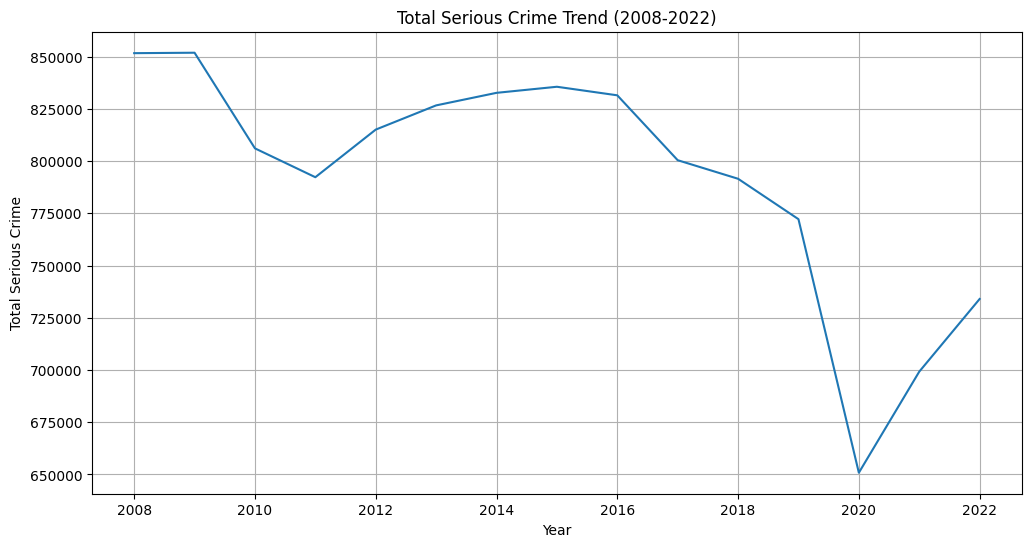

In [242]:
crime_trend = merged_df.groupby('date')['Total_Serious_Crime'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_trend, x='date', y='Total_Serious_Crime')
plt.title('Total Serious Crime Trend (2008-2022)')
plt.xlabel('Year')
plt.ylabel('Total Serious Crime')
plt.grid(True)
plt.show()

##Total Crime by Province:
This bar chart helps us identify which provinces have the highest cumulative crime counts.

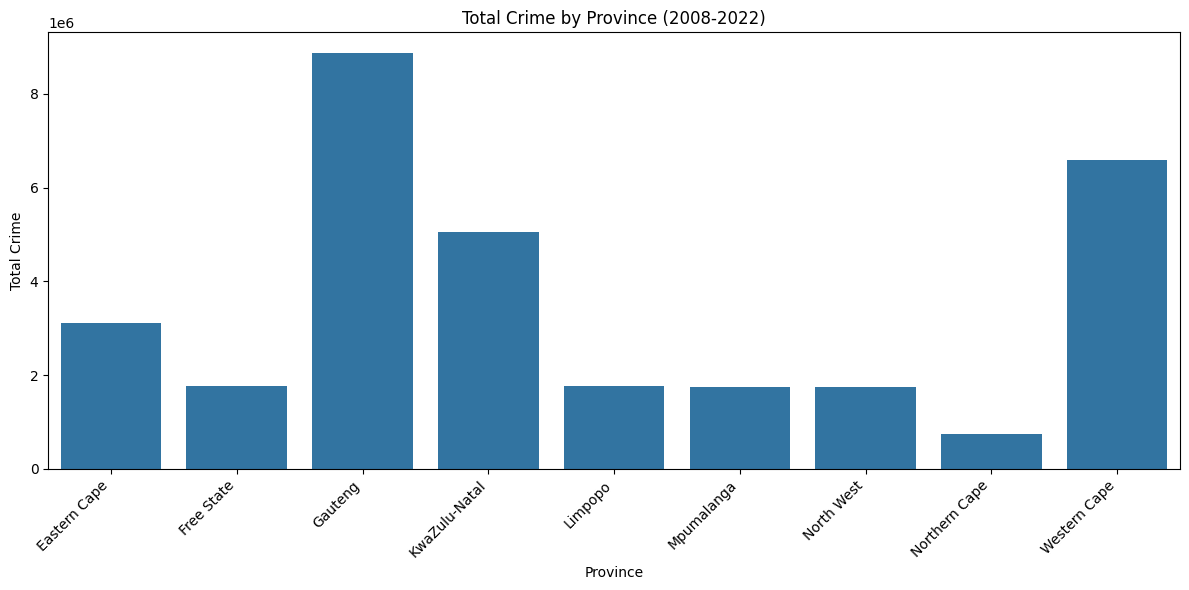

In [248]:
crime_by_province = merged_df.groupby('Province name')['total_crimes'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=crime_by_province, x='Province name', y='total_crimes')
plt.title('Total Crime by Province (2008-2022)')
plt.xlabel('Province')
plt.ylabel('Total Crime')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Most Common Types of Crime
This bar chart helps us understand the composition of crime in South Africa.

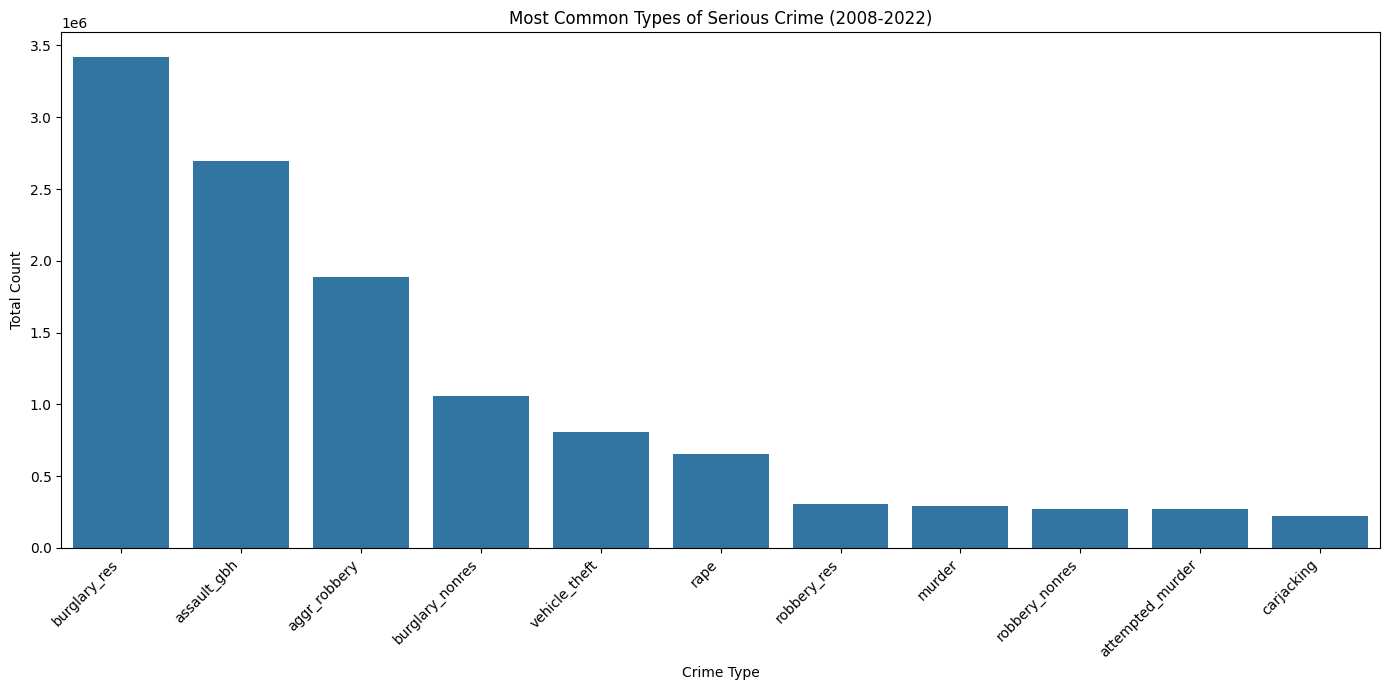

In [249]:
serious_crime_counts = merged_df[crime_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=serious_crime_counts.index, y=serious_crime_counts.values)
plt.title('Most Common Types of Serious Crime (2008-2022)')
plt.xlabel('Crime Type')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Distribution of Informal Dwellings
This histogram visualises the spread of the percentage of informal dwellings across municipalities.

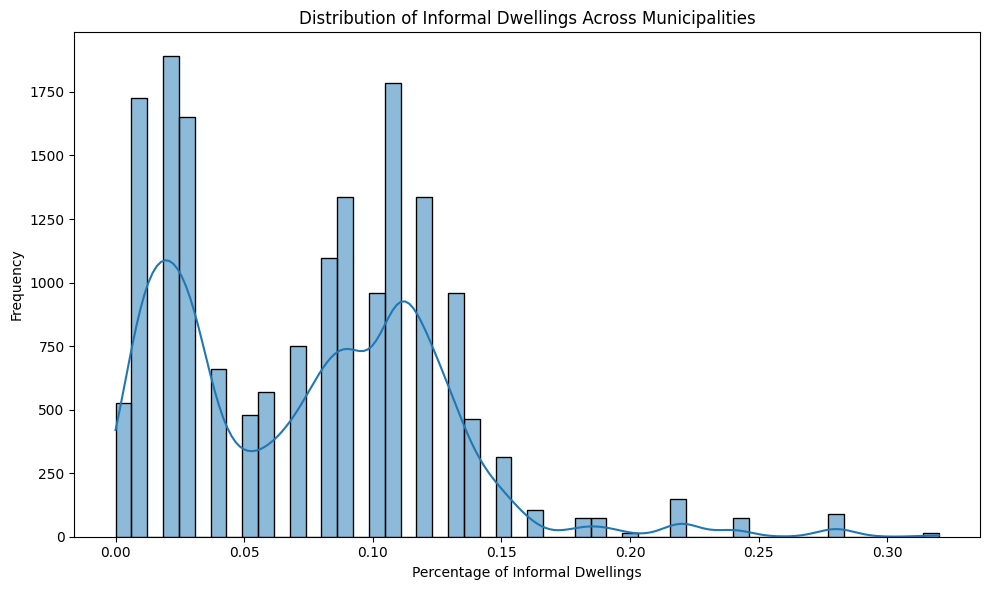

In [250]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='Informal Dwelling', kde=True)
plt.title('Distribution of Informal Dwellings Across Municipalities')
plt.xlabel('Percentage of Informal Dwellings')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##Crime Rate vs Informal Dwellings
this scatter plot hepls us visually inspect the relationship between a key socio-economic factor and the crime rate.

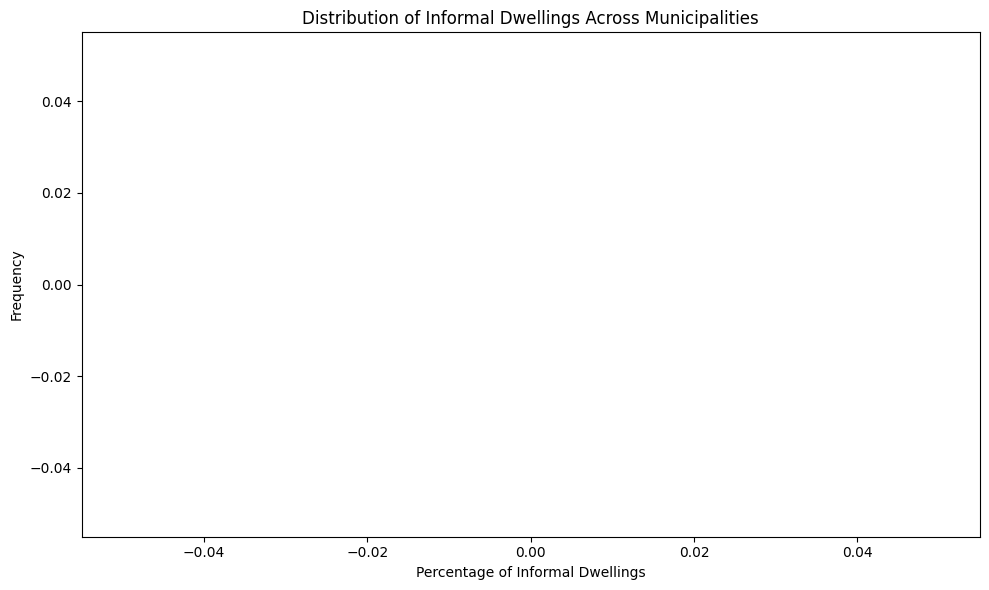

In [259]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Informal Dwelling')
plt.title('Distribution of Informal Dwellings Across Municipalities')
plt.xlabel('Percentage of Informal Dwellings')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [260]:
# Select socio-economic columns and crime rate
socio_economic_cols = [
    'Piped (tap) water inside dwelling', 'Piped (tap) water inside yard',
    'Piped (tap) water on community stand', 'No access to piped (tap) water',
    'Formal Dwelling', 'Traditional Dwelling', 'Informal Dwelling', 'Other Dwelling',
    'Flush toilet', 'Chemical toilet', 'Pit toilet', 'Bucket toilet', 'Other Toilet', 'No toilet',
    'Removed by local authority/private company/community members at least once a week',
    'Removed by local authority/private company/community members less often',
    'Communal refuse dump', 'Communal container/central collection point',
    'Own refuse dump', 'Dump or leave rubbish anywhere (no rubbish disposal)', 'Other Dump',
    'Electricity for Light', 'Gas for Light', 'Paraffin for Light', 'Candles for Light',
    'Solar for Light', 'Other Source of Light', 'None Source of Light',
    'Electricity for Cooking', 'Gas for Cooking', 'Paraffin for Cooking', 'Wood for Cooking',
    'Coal for Cooking', 'Animal dung', 'Solar for Cooking', 'Other Source of Cooking',
    'None Source of Cooking'
]

correlation_data = merged_df[socio_economic_cols + ['Crime_Rate_Per_100k']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Socio-Economic Factors and Crime Rate')
plt.tight_layout()
plt.show()

KeyError: "['Crime_Rate_Per_100k'] not in index"

#Classifying Crime Hotspots

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [244]:
columnToUse = [
    'Piped (tap) water inside dwelling', 'Piped (tap) water inside yard',
       'Piped (tap) water on community stand',
       'No access to piped (tap) water', 'Formal Dwelling',
       'Traditional Dwelling', 'Informal Dwelling', 'Other Dwelling',
       'Flush toilet', 'Chemical toilet', 'Pit toilet', 'Bucket toilet',
       'Other Toilet', 'No toilet',
       'Removed by local authority/private company/community members at least once a week',
       'Removed by local authority/private company/community members less often',
       'Communal refuse dump', 'Communal container/central collection point',
       'Own refuse dump',
       'Dump or leave rubbish anywhere (no rubbish disposal)', 'Other Dump',
       'Electricity for Light', 'Gas for Light', 'Paraffin for Light',
       'Candles for Light', 'Solar for Light', 'Other Source of Light',
       'None Source of Light', 'Electricity for Cooking', 'Gas for Cooking',
       'Paraffin for Cooking', 'Wood for Cooking', 'Coal for Cooking',
       'Animal dung', 'Solar for Cooking', 'Other Source of Cooking',
       'None Source of Cooking','date', 'other_theft', 'arson', 'assault_gbh', 'attempted_murder',
       'attempted_sexoff', 'bank_robbery', 'burglary_nonres', 'burglary_res',
       'carjacking', 'commercial_crime', 'common_assault', 'common_robbery',
       'contact_sexoff', 'dui', 'drug_crime', 'illegal_firearms', 'kidnapping',
       'malicious_damage', 'murder', 'rape', 'robbery_nonres', 'robbery_res',
       'cash_transit_robbery', 'aggr_robbery', 'sexual_assault',
       'sexual_offences', 'police_detected_sexoff', 'shoplifting',
       'stock_theft', 'vehicle_theft', 'theft_from_vehicle', 'truck_hijacking',
       'station', 'total_crimes','Municipality'
]

In [245]:
df = merged_df[columnToUse]

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 73 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Piped (tap) water inside dwelling                                                  17100 non-null  float64
 1   Piped (tap) water inside yard                                                      17100 non-null  float64
 2   Piped (tap) water on community stand                                               17100 non-null  float64
 3   No access to piped (tap) water                                                     17100 non-null  float64
 4   Formal Dwelling                                                                    17100 non-null  float64
 5   Traditional Dwelling                                                               17100 non-null  flo

In [247]:
merged_df['Total Population'] = merged_df['Total Population'].astype(str).str.replace(',', '', regex=False)
merged_df['Total Population'] = pd.to_numeric(merged_df['Total Population'], errors='coerce')

df['Crime_Rate_Per_100k'] = (merged_df['Total_Serious_Crime'] / (merged_df['Total Population'] + 1e-6)) * 100000

/tmp/ipython-input-3936142996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Crime_Rate_Per_100k'] = (merged_df['Total_Serious_Crime'] / (merged_df['Total Population'] + 1e-6)) * 100000


#Forecasting Crime Trends Over Time

#Drone Programming Simulation

##Identifying Crime Hotspots

Areas with an unusually high crime intensity score are classified as "hotspots." This score is determined by calculating the average crime count across all areas and adding a predefined margin. Any area exceeding this threshold is designated a hotspot.

##Defining the Threshold:

The threshold is calculated using the following formula:

threshold = df["Crime_Count"].mean() + df["Crime_Count"].std()An area is then marked as a "Hotspot" if its Crime_Count is greater than or equal to this threshold:

df["Hotspot"] = df["Crime_Count"] >= thresholdExamples:
Row1: Stock_theft = 35 → Not Hotspot
Row2: Rape = 92 → Hotspot
Row3: Murder = 65 → Not Hotspot
This methodology ensures that only areas with exceptionally high crime counts are flagged. The coordinates of these identified hotspots are then provided as Points of Interest (POIs) for drone simulations.

##3D Representation of Hotspots

Once hotspot locations are identified, they can be represented within a 3D coordinate system:
X, Y: Latitude and longitude, projected onto a flat plane (UTM projection is a common method).
Z: Altitude, which can be constant if the drone maintains a fixed flight height.
Python Visualization Tools

Several Python libraries can be used for 3D visualization:
Matplotlib: The Axes3D module is suitable for 3D scatter plots.
Plotly: Offers interactive 3D visualizations.
Code Snippets for Matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example coordinates for hotspots
hotspots = [(0,0,10), (20,5,10), (15,15,10), (30,10,10)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Unpack coordinates
x, y, z = zip(*hotspots)

# Create scatter plot
ax.scatter(x, y, z, c='r', marker='o')

# Set labels for axes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Altitude")

plt.show()

##Generating Waypoints and Path Planning

Once hotspots are identified, the next step is to plan a traversal path.

Simple Path Planning Patterns:
Lawnmower Pattern (Grid Sweep): This pattern is effective for comprehensive area coverage.
Example: Nearest Neighbor Path Algorithm
import numpy as np

def nearest_neighbor_path(points, start_index=0):
    points = np.array(points)
    n = len(points)
    visited = [start_index]
    unvisited = set(range(n)) - {start_index}

    while unvisited:
        last = visited[-1]
        next_city = min(unvisited, key=lambda i: np.linalg.norm(points[last]-points[i]))
        visited.append(next_city)
        unvisited.remove(next_city)

    return [points[i] for i in visited]

hotspots = [(0,0,10), (20,5,10), (15,15,10), (30,10,10)]
path = nearest_neighbor_path(hotspots)
print("Planned path:", path)

